<a href="https://colab.research.google.com/github/KidmanC/LaboratorioED2/blob/main/Labortario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
class QueueP:
    def __init__(self, len) -> None:
        self.__info = []
        self.__len = len

    def add(self, data):
        if len(self.__info) == self.__len:
            print("La cola esta llena")
            return
        self.__info.append(data)

    def pop(self):
        if len(self.__info) == 0:
            print("La pila esta vacia")
            return
        return self.__info.pop(0)

    def is_empty(self):
        return not bool(self.__info)

In [2]:
from typing import List
class Property:

  def __init__(self, title : str, department: str, city : str, property_type : str, latitude : int, longitude: int, surface_total : int, surface_covered : int, bedrooms : int, bathrooms : int, operation_type : str, price: int) -> None:
    self.title = title
    self.department = department
    self.city = city
    self.property_type = property_type
    self.latitude = latitude
    self.longitude = longitude
    self.surface_total = surface_total
    self.surface_covered = surface_covered
    self.bedrooms = bedrooms
    self.bathrooms = bathrooms
    self.operation_type = operation_type
    self.price = price

  def __repr__(self) -> str:
    rep = f'[{self.title}, {self.department}, {self.city}, {self.property_type}, {self.latitude}, {self.longitude}, {self.surface_total}, {self.surface_covered}, {self.bedrooms}, {self.bathrooms}, {self.operation_type}, {self.price}, {self.metric}]'
    return str(rep)


In [3]:
class Node:   #clase nodo
    def __init__(self, info: "Property"):
        self.info = info
        self.metric = self.info.price/self.info.surface_total  # se define la metrica en cada nodo al momento de crearlo
        #self.metric2 = float("{0:.4}".format(self))
        self.left = None
        self.right = None
        self.height = 1


    def balance(self):  #calcula el factor de equilibrio del nodo
        return height(self.right) - height(self.left)

    def update_height(self):     #actualiza la altura del nodo (al momento de insertar o eliminar)
        if self.left is not None:
          left_height = height(self.left)
        else:
          left_height = 0
        if self.right is not None:
          right_height = height(self.right)
        else:
          right_height = 0
        self.height = 1 + max(right_height, left_height)

def height(node):        #calcula la altura de un nodo
  if node is None:
      return 0
  else:
      left_height = height(node.left)
      right_height = height(node.right)
      return 1 + max(left_height, right_height)





In [4]:
#leer el csv

import pandas as pd

url = 'https://raw.githubusercontent.com/Jhonatan0001/Laboratorio/main/co_properties_final.csv'
df = pd.read_csv(url)

list_properties = df.values.tolist()

properties = [Property(x[0],x[1],x[2],x[3],x[4],x[5],x[6],x[7],x[8],x[9],x[10],x[11]) for x in list_properties]



In [5]:
from typing import Any, Optional, Tuple
import graphviz as gp
import folium
from IPython.display import display
nodos_desbalanceados =[]  #se inicializa una lista para tener los nodos desbalanceados en cada insercion

class Tree:    #se define la clase arbol

  def __init__(self):
    self.root = None
    self.balanced = True

  def plot_tree(self) -> "gp.graphs":    #funcion para graficar el arbol
    plot = gp.Digraph()
    code = self.root.info.title.split(" ")
    plot.node(str(code[-1]))

    def add_edges(node) -> None:
      if node.left:
        code_left = node.left.info.title.split(" ")
        code = node.info.title.split(" ")
        plot.node(str(code_left[-1]))
        plot.edge(str(code[-1]), str(code_left[-1]))
        add_edges(node.left)
      if node.right:
        code_right = node.right.info.title.split(" ")
        code = node.info.title.split(" ")
        plot.node(str(code_right[-1]))
        plot.edge(str(code[-1]), str(code_right[-1]))
        add_edges(node.right)

    add_edges(self.root)

    return plot

  def plot_tree_metric(self) -> "gp.graphs":  #funcion para graficar el arbol por metricas

    plot = gp.Digraph()
    code = self.root.metric
    plot.node(str(code))

    def add_edges(node) -> None:
      if node.left:
        code_left = node.left.metric
        code = node.metric
        plot.node(str(code_left))
        plot.edge(str(code), str(code_left))
        add_edges(node.left)
      if node.right:
        code_right = node.right.metric
        code = node.metric
        plot.node(str(code_right))
        plot.edge(str(code), str(code_right))
        add_edges(node.right)

    add_edges(self.root)

    return plot




  def balance_tree(self, root: "Node"): #verifica el factor de balanceo de todos los nodos del arbol (desde las hojas hasta la raiz)

    if root is not None:
          self.balance_tree(root.left)
          self.balance_tree(root.right)
          print(f'factor de equilibrio del Nodo {root.metric} = {root.balance()}')
          if root.balance() <-1 or root.balance() > 1:
            print("el arbol debe ser balanceado")
            self.balanced = False
            nodos_desbalanceados.append(root)
          return nodos_desbalanceados  #retorna los nodos desbalanceados


  def balance_insertar(self, nodo_desbalanceado: "Node"): #balancea el arbol luego de insertar o eliminar un nodo

    if not self.balanced: #verifica que el arbol no este balanceado
          if nodo_desbalanceado.balance() == 2 and nodo_desbalanceado.right.balance() >=0: #caso rotacion simple izquierda
            print('simple izquierda')
            self.rotacion_izq(nodo_desbalanceado)

          elif nodo_desbalanceado.balance() == -2 and nodo_desbalanceado.left.balance() <=0: #caso rotacion simple derecha
            print('simple derecha')
            self.rotacion_der(nodo_desbalanceado)

          elif nodo_desbalanceado.balance() == 2:      #caso rotacion doble derecha izquierda
            print('doble derecha izquierda')
            self.doble_der_izq(nodo_desbalanceado)

          else:                                      #caso rotacion doble izquierda derecha
            print('doble izquierda derecha')
            self.doble_izq_der(nodo_desbalanceado)

          self.balance_tree(self.root)             #se muestra que haya quedado balanceado

    nodos_desbalanceados.clear()  #reinicio de la lista de nodos desbalanceados
    self.balanced = True        #el arbol queda balanceado


  def rotacion_izq(self, nodo: "Node") -> "Node": #rotacion simple izquierda
    if nodo is not None:
        actual, padre = self.search_node(nodo)
        if nodo == self.root:
          print("nueva raiz", nodo.right.metric)
          self.root = nodo.right
        aux = nodo.right
        if aux.left is not None:
          nodo.right = aux.left
        else:
          nodo.right = None
        aux.left = nodo
        if padre is not None:
          if padre.metric > aux.metric:
            padre.left = aux
          else:
            padre.right = aux

        return aux

  def rotacion_der(self, nodo: "Node") -> "Node": #rotacion simple derecha
      if nodo is not None:
        actual, padre = self.search_node(nodo)
        if nodo == self.root:
          self.root = nodo.left
        aux = nodo.left
        if aux.right is not None:
          nodo.left = aux.right
        else:
          nodo.left = None
        aux.right = nodo
        if padre is not None:
          if padre.metric > aux.metric:
            padre.left = aux
          else:
            padre.right = aux

        return aux

  def doble_der_izq(self, nodo: "Node") -> "Node": #rotacion doble derecha izquierda
    nodo.right = self.rotacion_der(nodo.right)
    return self.rotacion_izq(nodo)

  def doble_izq_der(self, nodo: "Node") -> "Node": #rotacion doble izquierda derecha
    nodo.left = self.rotacion_izq(nodo.left)
    return self.rotacion_der(nodo)


  def search_node(self, elem : "float"):   #buscar un nodo y su padre
        actual, pad = self.root, None
        while actual is not None:
            if elem.metric == actual.metric:
                return actual, pad
            else:
                pad = actual
                if elem.metric < actual.metric:
                    actual = actual.left
                else:
                    actual = actual.right
        return actual, pad

  def insertar(self, elem:"Property") -> bool:     # funcion insertar

    to_insert = Node(elem)
    print("se inserta = ", to_insert.metric)
    if self.root is None:
      self.root = to_insert
      return True
    else:
      actual, padre = self.search_node(to_insert)

      if actual is None:  # El elemento no existe
        if to_insert.metric < padre.metric:
          padre.left = to_insert
        else:
          padre.right = to_insert

        nodos = []
        nodos = self.balance_tree(self.root)    #luego de insertar verifica que este balanceado y se toman los nodos desbalanceados

        if nodos is not None and len(nodos)>0:
          nodo_desbalanceado = nodos[0]    #se toma siempre el primero de los nodos desbalanceados (desde las hojas hasta la raiz)
          print("desbalanceado " , nodo_desbalanceado.metric)
          self.balance_insertar(nodo_desbalanceado)    #se hacen las rotaciones desde el nodo desbalanceado
          self.update_heights(self.root)     #luego de hacer las rotaciones, se actualizan las alturas de los nodos
        print('----------------------------------')

        return True
      return False

  def find_sus(self, nodo):
    while nodo.left is not None:
        nodo = nodo.left
    return nodo

  def delete(self, nodo):
    self.root = self._delete_recursive(self.root, nodo)

    nodos = []
    nodos = self.balance_tree(self.root) #luego de eliminar verifica que este balanceado y se toman los nodos desbalanceados

    if nodos is not None and len(nodos)>0:
      nodo_desbalanceado = nodos[0]
      #for i in nodos:
        #print("nodos desbalanceados" , i.metric) # nodos desbalanceados
      print("desbalanceado " , nodo_desbalanceado.metric)
      self.balance_insertar(nodo_desbalanceado)
      #self.update_heights(self.root)
    print('----------------------------------')

  def _delete_recursive(self, nodo, to_delete):
    if nodo is None:
        return nodo

    if to_delete.metric < nodo.metric:
        nodo.left = self._delete_recursive(nodo.left, to_delete)
    elif to_delete.metric > nodo.metric:
        nodo.right = self._delete_recursive(nodo.right, to_delete)
    else:
        # Caso 1: Nodo sin hijos o con un solo hijo
        if nodo.left is None:
            return nodo.right
        elif nodo.right is None:
            return nodo.left

        # Caso 2: Nodo con dos hijos
        # Encontrar el sucesor (nodo más pequeño en el subárbol derecho)
        temp = self.find_sus(nodo.right)
        nodo.metric = temp.metric
        nodo.info = temp.info

        # Eliminar el sucesor
        nodo.right = self._delete_recursive(nodo.right, nodo)

    return nodo


  def update_heights(self, root: "Node"):
    if root is not None:
          self.update_heights(root.left)
          self.update_heights(root.right)
          root.update_height()

  def __lvOrder(self,queue):#levelOrder recursivo
          if not queue.is_empty():
              current = queue.pop()
              print(current)
              if current.left:
                  queue.add(current.left)
              if current.right:
                  queue.add(current.right)
              self.__lvOrder(queue)
          else:
              return

  def buscar_tio(self, node: "Node", node2: None, node3: None, elem: "Property") -> "Node":
      if node is not None:
        if Node(elem).metric == node.metric:
          if node3 is not None:
            return node3.info.title
          else:
            return None
        elif  Node(elem).metric < node.metric:
          if node2 is not None:
            if node.metric == node2.left.metric:
              return self.buscar_tio(node.left, node, node2.right, elem)
            else:
              return self.buscar_tio(node.left, node, node2.left, elem)
          else:
            return self.buscar_tio(node.left, node, None, elem)
        else:
          if node2 is not None:
            if node.metric == node2.left.metric:
              return self.buscar_tio(node.right, node, node2.right, elem)
            else:
              return self.buscar_tio(node.right, node, node2.left, elem)
          return self.buscar_tio(node.right, node, None, elem)
      return None

  def buscar_abuelo(self, node) -> "Node":
    actual, pad = self.search_node(Node(node))
    if actual is None:
      print("El nodo no existe")
      return None
    elif pad is None:
      print("No tiene abuelo")
      return None
    else:
      actual2, grandpa = self.search_node(pad)
      if grandpa is not None:
        return grandpa.info.title
      else:
        print("No tiene abuelo")
        return None

  def level_order(self):
    Q1=QueueP(300)
    Q1.add(self.root)
    self.__lvOrder(Q1)


  def multiple_search(self, city=None, price=0,suf_cov=0, min=False):
#__________________________________
      node, queue1 = self.root, QueueP(250)
      queue1.add(node)
      nodeList=[]
      while not queue1.is_empty():
        node = queue1.pop()

        if city is None:
          if node.info.surface_covered >= suf_cov and node.info.price >= price and min is False:
            nodeList.append(node)
          if node.info.surface_covered >= suf_cov and node.info.price <= price and min is True:
            nodeList.append(node)
        else:
          if node.info.city == city and node.info.surface_covered >= suf_cov and node.info.price >= price and min is False:
            nodeList.append(node)
          if node.info.city == city and node.info.surface_covered >= suf_cov and node.info.price <= price and min is True:
            nodeList.append(node)
#__________________________________
        if node.left:
          queue1.add(node.left)
        if node.right:
          queue1.add(node.right)
      return nodeList

  def mapper(self,nodes):
    if nodes:
      m = folium.Map(location=[6, -72], zoom_start=6, zoom_control=False)
      if isinstance(nodes, list):
        for u in nodes:
        # Añade un marcador en una ubicación específica (por ejemplo, la Estatua de la Libertad)
          folium.Marker([u.info.latitude, u.info.longitude], tooltip=u.info.title).add_to(m)
      else:
        folium.Marker([nodes.info.latitude, nodes.info.longitude], tooltip=nodes.info.title).add_to(m)
      display(m)

In [6]:
tree = Tree()
for i in range(len(properties)):
  tree.insertar(properties[i])
print("raiz del arbol final: ", tree.root.metric)

Se han truncado las últimas 5000 líneas del flujo de salida.
factor de equilibrio del Nodo 4294478.527607362 = 0
factor de equilibrio del Nodo 5135135.135135135 = 0
factor de equilibrio del Nodo 5416666.666666667 = 0
factor de equilibrio del Nodo 5147058.823529412 = 0
factor de equilibrio del Nodo 4753519.736842105 = 0
factor de equilibrio del Nodo 6435643.564356436 = 0
factor de equilibrio del Nodo 7388059.701492538 = -1
factor de equilibrio del Nodo 8222222.222222222 = 0
factor de equilibrio del Nodo 10648148.148148147 = 0
factor de equilibrio del Nodo 8333333.333333333 = 0
factor de equilibrio del Nodo 8080808.080808081 = 0
factor de equilibrio del Nodo 6388888.888888889 = 0
factor de equilibrio del Nodo 4263565.891472869 = -1
factor de equilibrio del Nodo 3571428.5714285714 = 0
factor de equilibrio del Nodo 1187371.3109128345 = 0
----------------------------------
se inserta =  28571.428571428572
factor de equilibrio del Nodo 666.6666666666666 = 0
factor de equilibrio del Nodo 7428

In [15]:
tree.delete(Node(properties[4]))
tree.delete(Node(properties[8]))

factor de equilibrio del Nodo 666.6666666666666 = 0
factor de equilibrio del Nodo 7647.058823529412 = 0
factor de equilibrio del Nodo 7428.571428571428 = 0
factor de equilibrio del Nodo 9200.0 = 0
factor de equilibrio del Nodo 10000.0 = 0
factor de equilibrio del Nodo 9523.809523809523 = 0
factor de equilibrio del Nodo 8163.265306122449 = 0
factor de equilibrio del Nodo 11428.57142857143 = 0
factor de equilibrio del Nodo 12000.0 = 0
factor de equilibrio del Nodo 11538.461538461539 = 0
factor de equilibrio del Nodo 12363.636363636364 = 0
factor de equilibrio del Nodo 13274.336283185841 = 0
factor de equilibrio del Nodo 12500.0 = 1
factor de equilibrio del Nodo 12413.793103448275 = 1
factor de equilibrio del Nodo 12359.550561797752 = 1
factor de equilibrio del Nodo 10285.714285714286 = 1
factor de equilibrio del Nodo 14264.0 = 0
factor de equilibrio del Nodo 14444.444444444445 = -1
factor de equilibrio del Nodo 15000.0 = 0
factor de equilibrio del Nodo 15384.615384615385 = 0
factor de eq

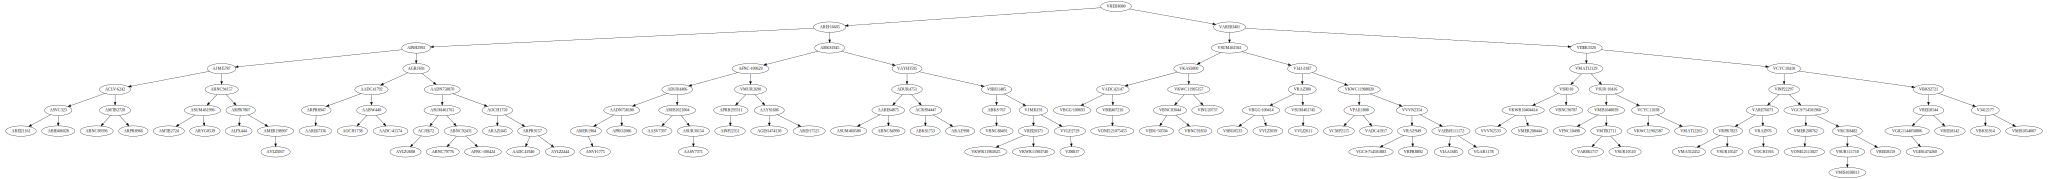

In [17]:
tree.plot_tree()

In [34]:
nodes_se=tree.multiple_search(price=1000000)
print(nodes_se)
print(len(nodes_se))

[<__main__.Node object at 0x77fcdad343a0>, <__main__.Node object at 0x77fcdace42b0>, <__main__.Node object at 0x77fcdace54e0>, <__main__.Node object at 0x77fcdace5f60>, <__main__.Node object at 0x77fcdad34f70>, <__main__.Node object at 0x77fcdace4790>, <__main__.Node object at 0x77fcdad34730>, <__main__.Node object at 0x77fcda4a78e0>, <__main__.Node object at 0x77fcdad43a30>, <__main__.Node object at 0x77fcda4c1840>, <__main__.Node object at 0x77fcdace4640>, <__main__.Node object at 0x77fcdad346d0>, <__main__.Node object at 0x77fcda46baf0>, <__main__.Node object at 0x77fcdad34460>, <__main__.Node object at 0x77fcda4df8b0>, <__main__.Node object at 0x77fcdace3460>, <__main__.Node object at 0x77fcdace50f0>, <__main__.Node object at 0x77fcda6171c0>, <__main__.Node object at 0x77fcdace0250>, <__main__.Node object at 0x77fcdacb4190>, <__main__.Node object at 0x77fcda482530>, <__main__.Node object at 0x77fcdace4910>, <__main__.Node object at 0x77fcda42aaa0>, <__main__.Node object at 0x77fcda

In [10]:
def metric(df, n_metric: int):
    control = []
    if n_metric == 1:       #Metrica 1: Precio por metro cuadrado
        for i, row in df.iterrows():
            control.append(round(row["price"]/row["surface_total"] , 2))
    elif n_metric == 2:     #Metrica 2: Precio por habitaciones y baños
        for i, row in df.iterrows():
            bedroom = (row["price"]/row["surface_covered"]) * (row["surface_covered"] *0.1) * row["bedrooms"]        #Suponiendo que el 10% de la superficie total está cubierta por dormitorios
            bathroom = (row["price"]/row["surface_covered"]) * (row["surface_covered"] *0.05) * row["bathrooms"]     #Suponiendo que el 5% de la superficie total está cubierta por baños
            control.append(bedroom + bathroom)                                                                       #precio que se paga por habitaciones y baños
    return control

a = metric(df, 1)
b = metric(df,2)

dup = [x for i, x in enumerate(a) if i != a.index(x)]
print(dup)
print(len(dup))

[2166666.67, 2500000.0, 16470.59, 3855421.69, 2000000.0, 28571.43, 10000.0]
7


In [35]:

# Crea un mapa centrado en una ubicación inicial
m = folium.Map(location=[6, -72], zoom_start=6, zoom_control=False)

for u in nodes_se:
# Añade un marcador en una ubicación específica (por ejemplo, la Estatua de la Libertad)
  folium.Marker([u.info.latitude, u.info.longitude], tooltip=u.info.title).add_to(m)

# Muestra el mapa en pantalla
display(m)


INSERTAR

In [12]:
columns = df.columns.tolist()
datas=[]
print(len(columns))
for c in columns:
  x= input(f'escriba {c}')
  datas.append(x)
tree.insertar(property(datas[0],datas[1],datas[2],datas[3],datas[4],datas[5],datas[6],datas[7],datas[8],datas[9],datas[10],datas[11]))

12


KeyboardInterrupt: ignored

ELIMINAR

In [ ]:
x= input('Escriba la metrica del nodo a eliminar')
nod,pad=tree.search_node(float(x))
tree.delete(nod)

BUSCAR POR METRICA

In [ ]:
x= input('Escriba la metrica del nodo a eliminar')
nod,pad=tree.search_node(float(x))